In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Import dataset containing grayscale digits
- How are digits represented in the dataset?
  - SOLUTION: - 64 dimensional vectors of integers from 0 (white) to 16 (black)

In [2]:
from sklearn.datasets import load_digits
dataset = load_digits()
digits = dataset.data
target = dataset.target

### Visualize a digit

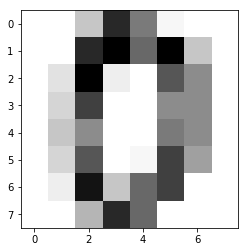

In [3]:
plt.imshow(digits[0].reshape(8,8),cmap='Greys')

## PCA Impementation

### 1. Compute covariation matrix

In [4]:
cov_mat = np.cov(digits.transpose())
print digits
print cov_mat

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.8229975   2.40099498 ... -0.1598953   0.09851423
  -0.07406182]
 [ 0.          2.40099498 22.60837352 ... -1.15544033  1.41203571
   0.72988047]
 ...
 [ 0.         -0.1598953  -1.15544033 ... 34.81734839 15.64854441
   2.87558266]
 [ 0.          0.09851423  1.41203571 ... 15.64854441 16.73258202
   4.72078588]
 [ 0.         -0.07406182  0.72988047 ...  2.87558266  4.72078588
   3.46005282]]


### 2. Compute eigenvalues and eigenvectors
If we use `np.linalg.eig`, no sorting is needed as the returned output is already sorted.

The eigenvectors are the columns of eig_vecs matrix.

In [5]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

### 3. Project digits to first two principal components
(don't forget to do the mean normalization of the digits before transforming)

In [6]:
W = eig_vecs[:,:2]
mean_vector = digits.mean(0)
normalized_digits = digits - mean_vector
projected_digits = np.matmul(normalized_digits,W)

### 4. Explained variance
1. If we want to keep 90 % variance, how many principal components do we keep?

We would keep the first 21 principal components.

2. Plot the explained variance based on number of components
  - x-axis = number of principal components
  - y-axis = how much variance do first `x` components explain

21


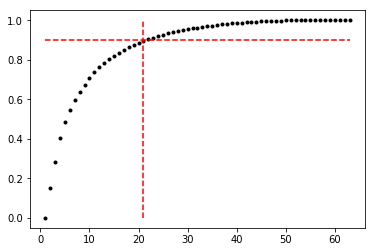

In [25]:
x_data = np.arange(1,eig_vals.size)

def sum_eig_vals(x): 
  for n in range(0,x):
    yield sum(eig_vals[:n])/sum(eig_vals)


y_data = np.fromiter(sum_eig_vals(eig_vals.size), dtype=float, count=63)
ninety = np.argmax(y_data>0.9)
print ninety
plt.plot(x_data,y_data,'k.')
plt.plot((ninety,ninety),(0,1),'r--')
plt.plot((1,63),(0.9,0.9),'r--')

### 5. Plotting digit classes based on first two principal components
- Which class is easy and which class is hard to distinguish from others?

_Zero is easy to distinguish from other digits._

- Which two classes overlap a lot?

_As expected, 8 and 9 overlap a lot._

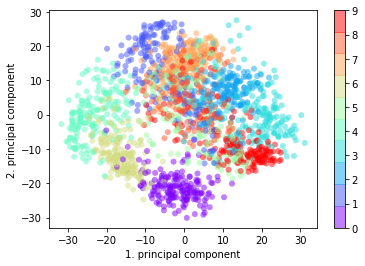

In [8]:
plt.scatter(projected_digits[:, 0], projected_digits[:, 1],
            c=target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('1. principal component')
plt.ylabel('2. principal component')
plt.colorbar();

## Questions Task 3 
#### 1._Dataset: How many dimensions does each data vector have?_

Each data vector has 64 Dimensions.

#### 2._What is a covariance matrix and what is its role for PCA?_

The covariance matrix ist a symmetric matrix with one row and one column for each feature. The entries are the covariances of two different features corresponding to the row and column position of the entry in question.

It's role for the PCA is to serve as a basis for determining how the data is spread, in order to decrease the dimensionality. The eigenvectors of the covariance matrix determine the directions along which the variance of the data is the largest. This allows us to project the data down onto a smaller dimensionality, if the dataset contains features (or combinations of features), that are redundant.   

#### 3._What is the meaning of eigenvalues in a PCA?_
The eigenvalues are a measure for the spread of the Data along the corresponding principla component (eigenvector).
A large eigenvalue indicates a large variance of the data in the direction of the corresponding eigenvector.

#### 4._Transform the data using the first two principal components. What do you observe? Explain._
The first two principal components already allow to partly classify the data with some success. The ouput is showing a clustering of the classes. Digits, which do not resemble others, can already be quite safely classified using only those two components, even though most classes still have frequent outliers in other clusters. Many digit-classes still overlap each other in a way, that doesn't allow for a good classification of those digits.